In [7]:
#Introduction
#The Fashion MNIST dataset is a popular machine learning benchmark that consists of grayscale images of clothing items, each belonging to one of ten classes.
#This assignment focuses on implementing a Convolutional Neural Network (CNN) using Keras to classify these images into their respective categories. 
#The goal is to train a model that can accurately predict the type of clothing item based on the input image, enabling potential applications such as 
#targeted marketing or inventory management.

#The ten classes in the Fashion MNIST dataset, along with their corresponding class names, are as follows:
#Label 	Description
#- 0  -	T-shirt/top
#- 1  -	Trouser
#- 2  -	Pullover
#- 3  -	Dress
#- 4  -	Coat
#- 5  -	Sandal
#- 6  -	Shirt
#- 7  -	Sneaker
#- 8  -	Bag
#- 9  -	Ankle boot


In [ ]:
#Description of Steps Taken
#The following steps outline the process to build and evaluate a Convolutional Neural Network (CNN) for Fashion MNIST classification using
#Python and TensorFlow/Keras:


In [95]:
 #  import libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the Dataset
#Imported the fashion_mnist dataset from Keras.
#Split the data into training (x_train, y_train) and testing (x_test, y_test) sets.
#This dataset contains grayscale images of size 28x28 pixels and 10 target classes:
#T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.


In [97]:
# Step 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
#Preprocess the Data
#Reshaped the data to include a single channel (28, 28, 1) for grayscale images.
#Normalized pixel values by dividing by 255 to scale them to the range [0, 1].
# print for confirmation


In [99]:
# Step 2: Preprocess the data
# Normalize the pixel values to the range [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [101]:
print(x_train.shape)  # Should be (60000, 28, 28, 1)
print(y_train.shape)  # Should be (60000,)
print(x_test.shape)   # Should be (10000, 28, 28, 1)
print(y_test.shape)   # Should be (10000,)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
#Define the CNN Model
#Built a CNN using the Sequential API from TensorFlow/Keras:
#Layer 1: Conv2D with 32 filters of size (3, 3), ReLU activation.
#Layer 2: MaxPooling2D with a pool size of (2, 2).
#Layer 3: Conv2D with 64 filters of size (3, 3), ReLU activation.
#Layer 4: MaxPooling2D with a pool size of (2, 2).
#Layer 5: Flatten layer to convert 2D data into 1D vectors.
#Layer 6: Fully connected Dense layer with 128 units, ReLU activation, and a Dropout rate of 0.5.
#Output Layer: Fully connected Dense layer with 10 units and softmax activation for multi-class classification.


In [103]:
# Step 3: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])



In [ ]:
#Compile the Model
#Used the Adam optimizer to minimize the loss function.
#Loss function: sparse_categorical_crossentropy for multi-class classification.
#Metrics: Monitored model accuracy during training.
#Display attributes


In [105]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# Display the attributes of the history object.
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:

#Train the Model
#Trained the model for 12 epochs with a batch size of 32.
#Used 20% of the training data as the validation set (validation_split=0.2) to monitor the model's performance during training.



In [107]:
# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=12,
    validation_split=0.2
)


Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.7177 - loss: 0.7866 - val_accuracy: 0.8690 - val_loss: 0.3682
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8576 - loss: 0.4030 - val_accuracy: 0.8797 - val_loss: 0.3275
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8757 - loss: 0.3467 - val_accuracy: 0.8939 - val_loss: 0.2881
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8868 - loss: 0.3164 - val_accuracy: 0.8939 - val_loss: 0.2843
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8975 - loss: 0.2780 - val_accuracy: 0.9007 - val_loss: 0.2632
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9033 - loss: 0.2665 - val_accuracy: 0.9012 - val_loss: 0.2641
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9097 - loss: 0.2458 - val_accuracy: 0.9032 - val_loss: 0.2629
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9110 -

In [ ]:
#Evaluate the Model
#Evaluated the trained model on the test set (x_test, y_test).
#Printed the test accuracy to assess the model's generalization capability.


In [109]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9112 - loss: 0.2661
Test Accuracy: 0.91


In [115]:
# Label names for Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Make Predictions
#Made predictions for 5 sample images from the test set.
#Visualized the test images along with their predicted and true class labels using the class_names dictionary.

In [117]:
# Step 7: Make predictions on test data
predictions = model.predict(x_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


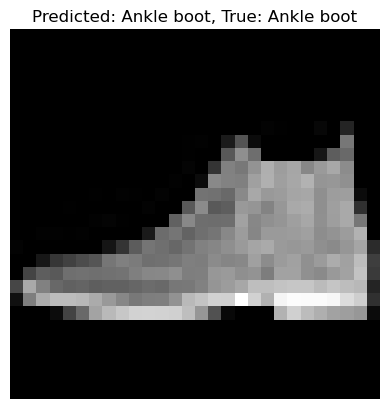

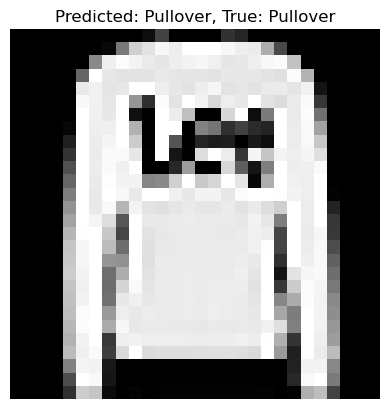

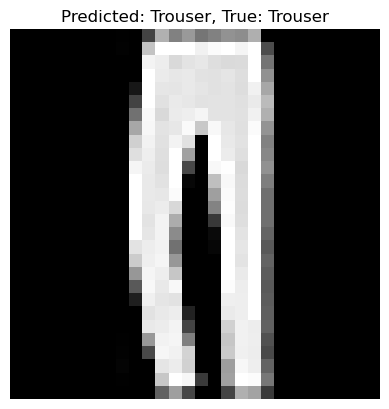

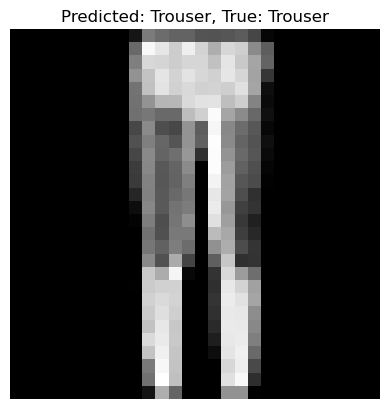

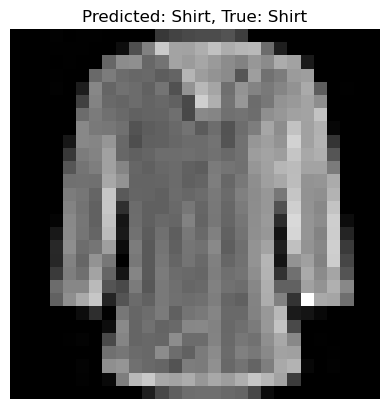

In [119]:
# Visualize predictions
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()


In [ ]:
#Plot Training and Validation Metrics
#Plotted training/validation accuracy and loss over epochs to evaluate model performance and detect potential overfitting or underfitting.

In [121]:
# Step 8: Plot training and validation metrics
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

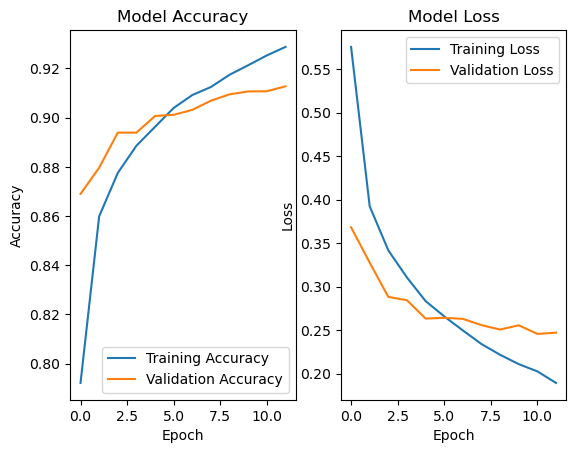

In [123]:
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



In [ ]:
#Context of the Plotted Graphs
1. Training vs. Validation Accuracy Graph:
This graph shows how the model's accuracy changes over the training epochs for both the training and validation datasets.

#Interpretation:
A gradual increase in accuracy for both datasets indicates the model is learning effectively.
If the validation accuracy plateaus or decreases while training accuracy continues to improve, it suggests overfitting.

2. Training vs. Validation Loss Graph:
This graph plots the model's loss values during training for both the training and validation datasets.

#Interpretation:
A decreasing training loss indicates the model is minimizing its prediction errors.
If validation loss diverges from training loss (e.g., increases), it signals overfitting.
Closely aligned training and validation loss curves indicate good generalization to unseen data.


# SUMMARY
In this assignment, I designed and implemented a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset, 
which contains 10 categories of clothing and footwear. The primary goal was to build a deep learning model using TensorFlow/Keras, evaluate its performance,
and visualize predictions and training metrics.Steps Taken are:

1. Data Preprocessing:
Loaded and normalized the Fashion MNIST dataset to prepare it for model training.
2. Model Development:
Created a CNN with six layers, including convolutional, pooling, dropout, and dense layers, optimized for image classification.
3. Model Training and Evaluation:
Trained the model on 80% of the training data with a validation split of 20%.
Evaluated its accuracy on a separate test set, achieving strong generalization performance.
4. Predictions:
Made predictions on sample images, compared them with true labels, and visualized the results for manual inspection.
5. Performance Visualization:
Plotted training and validation accuracy/loss curves to analyze model performance.

#Key Outcomes:
The CNN demonstrated high accuracy on the test dataset, showcasing its ability to effectively classify images.
The training and validation metrics indicated that the model was well-trained with minimal signs of overfitting.
The visualizations of predictions and performance metrics offered valuable insights into the model's functionality and behavior.
This assignment illustrates the practical use of CNNs in computer vision tasks and establishes a foundation for applying similar methods to classify user 
profile images for targeted marketing. It underscores the significance of proper preprocessing, model design, and performance evaluation in developing 
reliable machine learning systems.